# 大陆深证股票3000点缠绕策略

## 原理 
1. 目前内地因经济下行，长线看跌，有看跌方向做长期保障。
2. 大陆为宏观调控下的 市场经济，因此政策线将滞跌，使股票围绕政策先波动
3. 2与1就形成了 主观与客观的背离
4. 可围绕政策线做波动，但长期看跌

## 交易对象
股票

## 交易周期
D, M

## 交易指标
PPI CPI 人口老龄化率 通胀指数 股票涨跌率 政策线

## 风险控制

## 交易策略


In [ ]:
# 中国 CPI 月率报告
import akshare as ak
macro_china_cpi_monthly_df = ak.macro_china_cpi_monthly()
print(macro_china_cpi_monthly_df)
print(macro_china_cpi_monthly_df.name)

In [ ]:
#物流景气指数
macro_china_lpi_index_df = ak.macro_china_lpi_index()
print(macro_china_lpi_index_df)

[(datetime.date(2022, 10, 10), 3024.391, 2974.145, -1, 7768), (datetime.date(2022, 10, 12), 2979.793, 3025.506, 1, 7770), (datetime.date(2022, 10, 24), 3038.929, 2977.555, -1, 7778), (datetime.date(2022, 11, 2), 2969.2, 3003.37, 1, 7785), (datetime.date(2022, 11, 3), 3003.37, 2997.806, -1, 7786), (datetime.date(2022, 11, 4), 2997.806, 3070.796, 1, 7787), (datetime.date(2023, 10, 20), 3005.393, 2983.059, -1, 8019), (datetime.date(2023, 10, 27), 2988.299, 3017.784, 1, 8024), (datetime.date(2023, 12, 5), 3022.914, 2972.296, -1, 8051), (datetime.date(2023, 12, 12), 2991.439, 3003.438, 1, 8056), (datetime.date(2023, 12, 13), 3003.438, 2968.761, -1, 8057)]


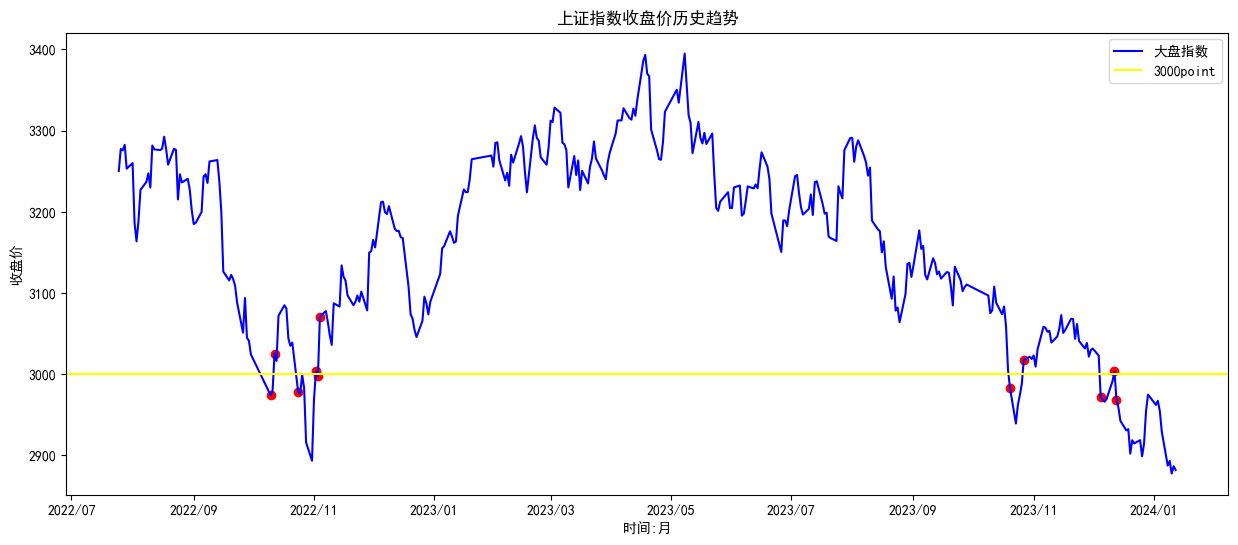

start date: 2023-12-12
end date: 2024-01-12
rate: 0.042


In [25]:
import akshare as ak
import numpy as np

# 取近30天指数
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import mpl
import matplotlib 


sh000001_close = ak.stock_zh_index_daily(symbol="sh000001")
end_index = sh000001_close.shape[0] - 360

sh000001_close = sh000001_close[end_index:]

# 获取大盘指数，转折点
def find_reverse_point(dates, line):
    reverse_point = []
    last_close = dates.iloc[0]['close']
    #print(last_close)
    for index, row in dates.iterrows():
        #print(row)
        curr_close = row['close']
        if last_close > line and curr_close < line:
            reverse_point.append((row['date'], last_close, curr_close, -1, index))
        if last_close < line and curr_close > line:
            reverse_point.append((row['date'], last_close, curr_close, 1, index))
        last_close = curr_close
    return reverse_point
    
    
reverse_points = find_reverse_point(sh000001_close, 3000)
reverse_marker_dates = []
reverse_marker_points = []
for reverse_point in reverse_points:
    reverse_marker_dates.append(reverse_point[0])
    reverse_marker_points.append(reverse_point[2])
    
print(reverse_points)
#print(reverse_marker)
#print(sh000001_close)
#print(reverse_marker_dates)
#print(reverse_marker_points)

mpl.rcParams['font.sans-serif']=['simhei']# 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
mpl.rcParams['figure.figsize'] = (15.0, 6.0)
#print(type(sh000001_close))


plt.plot(sh000001_close['date'], sh000001_close['close'], label='大盘指数',color='blue')
plt.axhline(y=3000, label='3000point', color='yellow')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m'))
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
#plt.gca().xaxis.set_major_locator(mdatesDayLocator())


#import akshare as ak

plt.scatter(reverse_marker_dates, reverse_marker_points, marker='o', color='red')

plt.title("上证指数收盘价历史趋势")
plt.xlabel('时间:月')
plt.ylabel('收盘价')
plt.legend(loc='best')
plt.show()

offset = -2 #set by user!
#print(reverse_points[offset])
start_date = reverse_points[offset][0]
end_date = sh000001_close.iloc[-1]['date']

def set_date(df, key):
    date_list = df[key].to_list()
    date_index=[]
    for date_elem in date_list:
        date_index.append(date_elem.strftime('%Y-%m-%d'))
    return df.set_axis(date_index)

df = set_date(sh000001_close, 'date')
#print(sh000001_close)
start_date = reverse_points[offset][0]
end_date = sh000001_close.iloc[-1]['date']
start_price = df.loc[start_date.strftime('%Y-%m-%d'), 'close']
end_price = df.loc[end_date.strftime('%Y-%m-%d'), 'close']

rate = (start_price - end_price )/ end_price
print("start date:", start_date)
print("end date:", end_date)
print("rate: %.3f" % rate)

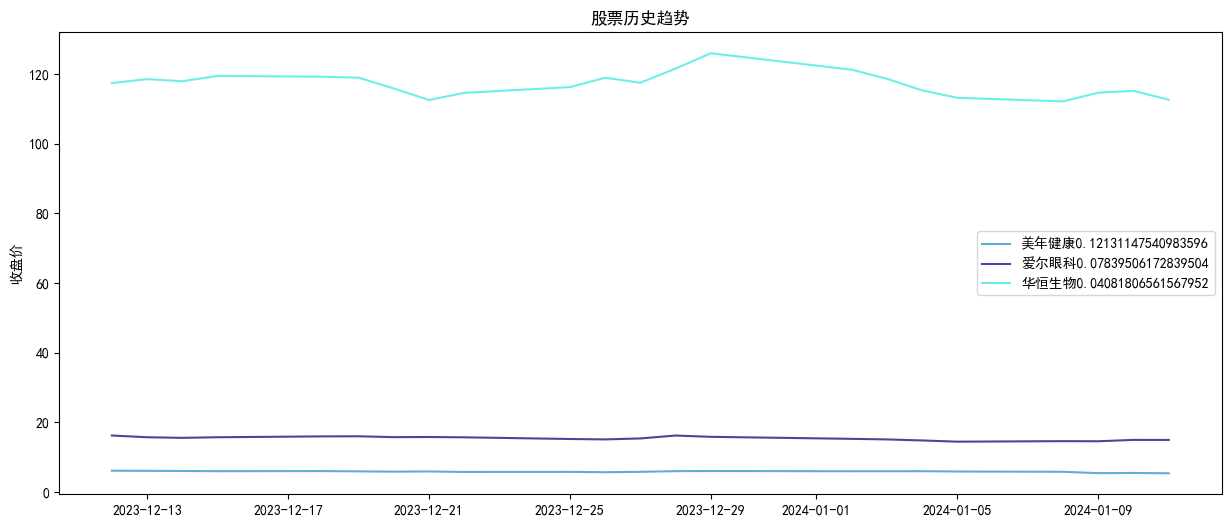

In [33]:
import akshare as ak
import numpy as np
import random
from datetime import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import mpl
import matplotlib 


nameList = ['美年健康', '爱尔眼科', '华恒生物']
codeList = ['002044', '300015', '688639']

start_date = datetime.strptime('2023-12-12', "%Y-%m-%d")
end_date = datetime.strptime('2024-01-11', "%Y-%m-%d")

def set_date(df, key):
    date_list = df[key].to_list()
    date_index=[]
    for date_elem in date_list:
        date_index.append(date_elem.strftime('%Y-%m-%d'))
    return df.set_axis(date_index)

#定义随机生成颜色函数
def randomcolor():
    colorArr = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    color ="#"+''.join([random.choice(colorArr) for i in range(6)])
    return color

def draw_one_code(ax, name, code, start_date, end_date):
    df = ak.stock_zh_a_hist(symbol=code, period="daily", start_date=start_date.strftime('%Y%m%d'), end_date=end_date.strftime('%Y%m%d'), adjust="")
    df = set_date(df, '日期')
    start_price = df.loc[start_date.strftime('%Y-%m-%d'), '收盘']
    end_price = df.loc[end_date.strftime('%Y-%m-%d'), '收盘']
    rate = (start_price - end_price) / start_price
    ax.plot(df['日期'], df['收盘'], label=name + str(rate),color=randomcolor())
    
#print(stock_zh_a_hist_df)
mpl.rcParams['font.sans-serif']=['simhei']# 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
mpl.rcParams['figure.figsize'] = (15.0, 6.0)




for i in range(len(codeList)):
    draw_one_code(plt, nameList[i], codeList[i], start_date, end_date)
    
plt.title("股票历史趋势")
plt.ylabel('收盘价')
plt.legend(loc='best')

#for index, row in stock_zh_a_hist_df.iterrows():
#    if(row['收盘'] >= row['开盘']):
#        axVol.bar(row['日期'],row['成交量']/1000000,width = 0.5,color='red')
#    else:    
#        axVol.bar(row['日期'],row['成交量']/1000000,width = 0.5,color='green')
plt.show()